# **Obtención y preparación de datos**

# OD23. Tarea Final

Normalmente, los proyectos de ciencia de datos, comienzan con estadísticas descriptivas para tener una idea de las propiedades del conjunto de datos que se está trabajando. Afortunadamente, es fácil obtener estas estadísticas con las estructuras de datos de **Pandas**.

## <font color='blue'>**Estadística Descriptiva con la Base de Datos Iris**</font>

En este proyecto, deberán implemnetar el cálculo de varias estadísticas descriptivas para el clásico <a href="https://en.wikipedia.org/wiki/Iris_flower_data_set">conjunto de datos de iris</a>.

El siguiente código, carga los paquetes necesarios y también el conjunto de datos iris.

**load_iris()** carga en un objeto que contiene el conjunto de datos de iris.

In [1]:
import pandas as pd
import numpy as np

from pandas import DataFrame
from sklearn.datasets import load_iris   

iris_obj = load_iris()

## <font color='green'>Actividad 1</font>

Basado en la estructura del objeto **iris_obj**, convierta este en un dataframe.


In [2]:
iris_obj

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

In [3]:
#Solución 1
datos = pd.DataFrame(iris_obj['data'], columns=['LargoSépalo','AnchoSépalo','LargoPétalo','AnchoPétalo']) #extraer data
target = pd.DataFrame(iris_obj['target'], columns=['Especie']) #extraer especie
iris = pd.merge(datos,target,left_index=True, right_index=True) #unir usando merge
iris

,LargoSépalo,AnchoSépalo,LargoPétalo,AnchoPétalo,Especie
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


<font color='green'>Fin Actividad 1</font>

## <font color='green'>Actividad 2</font>

1. Reemplace los valores de la columna "species" por los siguientes valores:
  * "setosa" = 0
  * "versicolor" = 1
  * "virginica" = 2

2. Agrupe las muestras por especies
3. Sin usar el método **describe()**, calcule los estadísticos básicos de la muestra:
  * cantidad de elementos no nulos
  * media
  * varianza
  * Desviación estándar
  * Percentiles y cuartiles
  * Rango inter-cuartílico
  * Valores máximos y mínimos
  * Rango (diferencia entre el máximo y el mínimo)
4. Repita algunos de los análisis anteriores, pero muestre sus resultados por columnas y especies.
5. Compare sus resultados usando el metodo **describe()** por columnas y por especies
6. Generar una tabla multi-indice por "especies" y "ancho del pétalo" y que de cuenta de la suma de los valores de cada clase



In [4]:
#Solución 1
species = {0:'setosa',1:'versicolor',2:'virginica'} #Se define un diccionario con los cambios a realizar
iris['Especie'].replace(species,inplace=True) #Se reemplazan los valores de la columna Especie, por los valores correspondientes a cada clave del diccionario
iris

,LargoSépalo,AnchoSépalo,LargoPétalo,AnchoPétalo,Especie
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [5]:
#Solución 3 - número de elementos no nulos
iris.groupby(by=['Especie']).count() # Retorna cuantos filas tienen datos por cada columna

,LargoSépalo,AnchoSépalo,LargoPétalo,AnchoPétalo
Especie,,,,
setosa,50,50,50,50
versicolor,50,50,50,50
virginica,50,50,50,50


In [6]:
#Solución 3 - media
iris.groupby(by=['Especie']).mean()

,LargoSépalo,AnchoSépalo,LargoPétalo,AnchoPétalo
Especie,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [7]:
#Solución 3 - varianza
iris.groupby(by=['Especie']).var()

,LargoSépalo,AnchoSépalo,LargoPétalo,AnchoPétalo
Especie,,,,
setosa,0.124249,0.143690,0.030159,0.011106
versicolor,0.266433,0.098469,0.220816,0.039106
virginica,0.404343,0.104004,0.304588,0.075433


In [8]:
#Solución 3 - desviación estándar
iris.groupby(by=['Especie']).std()

,LargoSépalo,AnchoSépalo,LargoPétalo,AnchoPétalo
Especie,,,,
setosa,0.352490,0.379064,0.173664,0.105386
versicolor,0.516171,0.313798,0.469911,0.197753
virginica,0.635880,0.322497,0.551895,0.274650


In [9]:
#Solución 3 - cuartiles
iris.groupby(by=['Especie']).quantile([.25, .50, .75])

LargoSépalo  AnchoSépalo  LargoPétalo  AnchoPétalo
Especie                                                            
setosa     0.25        4.800        3.200        1.400          0.2
           0.50        5.000        3.400        1.500          0.2
           0.75        5.200        3.675        1.575          0.3
versicolor 0.25        5.600        2.525        4.000          1.2
           0.50        5.900        2.800        4.350          1.3
           0.75        6.300        3.000        4.600          1.5
virginica  0.25        6.225        2.800        5.100          1.8
           0.50        6.500        3.000        5.550          2.0
           0.75        6.900        3.175        5.875          2.3

In [10]:
#Solución 3 - primer y tercer cuartil
iris.groupby(by=['Especie']).quantile([0.75, 0.25])

LargoSépalo  AnchoSépalo  LargoPétalo  AnchoPétalo
Especie                                                            
setosa     0.75        5.200        3.675        1.575          0.3
           0.25        4.800        3.200        1.400          0.2
versicolor 0.75        6.300        3.000        4.600          1.5
           0.25        5.600        2.525        4.000          1.2
virginica  0.75        6.900        3.175        5.875          2.3
           0.25        6.225        2.800        5.100          1.8

In [11]:
#Solución 3 - Rango inter-cuartílico
iris.groupby(by=['Especie']).quantile([0.75, 0.25]).groupby('Especie').agg(np.subtract.reduce)

,LargoSépalo,AnchoSépalo,LargoPétalo,AnchoPétalo
Especie,,,,
setosa,0.400,0.475,0.175,0.1
versicolor,0.700,0.475,0.600,0.3
virginica,0.675,0.375,0.775,0.5


In [12]:
#Solución 3 - mínimos
iris.groupby(by=['Especie']).min()

,LargoSépalo,AnchoSépalo,LargoPétalo,AnchoPétalo
Especie,,,,
setosa,4.3,2.3,1.0,0.1
versicolor,4.9,2.0,3.0,1.0
virginica,4.9,2.2,4.5,1.4


In [13]:
#Solución 3 - máximos
iris.groupby(by=['Especie']).max()

,LargoSépalo,AnchoSépalo,LargoPétalo,AnchoPétalo
Especie,,,,
setosa,5.8,4.4,1.9,0.6
versicolor,7.0,3.4,5.1,1.8
virginica,7.9,3.8,6.9,2.5


In [14]:
#Solución 3 - rango
iris.groupby(by=['Especie']).agg(np.ptp)

,LargoSépalo,AnchoSépalo,LargoPétalo,AnchoPétalo
Especie,,,,
setosa,1.5,2.1,0.9,0.5
versicolor,2.1,1.4,2.1,0.8
virginica,3.0,1.6,2.4,1.1


In [15]:
iris.describe() #con describe dataframe completo

,LargoSépalo,AnchoSépalo,LargoPétalo,AnchoPétalo
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [16]:
#Con describe por especie
iris[iris['Especie']=='setosa'].describe()

,LargoSépalo,AnchoSépalo,LargoPétalo,AnchoPétalo
count,50.00000,50.000000,50.000000,50.000000
mean,5.00600,3.428000,1.462000,0.246000
std,0.35249,0.379064,0.173664,0.105386
min,4.30000,2.300000,1.000000,0.100000
25%,4.80000,3.200000,1.400000,0.200000
50%,5.00000,3.400000,1.500000,0.200000
75%,5.20000,3.675000,1.575000,0.300000
max,5.80000,4.400000,1.900000,0.600000


In [17]:
#Con describe por especie
iris[iris['Especie']=='versicolor'].describe()

,LargoSépalo,AnchoSépalo,LargoPétalo,AnchoPétalo
count,50.000000,50.000000,50.000000,50.000000
mean,5.936000,2.770000,4.260000,1.326000
std,0.516171,0.313798,0.469911,0.197753
min,4.900000,2.000000,3.000000,1.000000
25%,5.600000,2.525000,4.000000,1.200000
50%,5.900000,2.800000,4.350000,1.300000
75%,6.300000,3.000000,4.600000,1.500000
max,7.000000,3.400000,5.100000,1.800000


In [18]:
#Con describe por especie
iris[iris['Especie']=='virginica'].describe()

,LargoSépalo,AnchoSépalo,LargoPétalo,AnchoPétalo
count,50.00000,50.000000,50.000000,50.00000
mean,6.58800,2.974000,5.552000,2.02600
std,0.63588,0.322497,0.551895,0.27465
min,4.90000,2.200000,4.500000,1.40000
25%,6.22500,2.800000,5.100000,1.80000
50%,6.50000,3.000000,5.550000,2.00000
75%,6.90000,3.175000,5.875000,2.30000
max,7.90000,3.800000,6.900000,2.50000


In [19]:
#Creación de tabla multíndice
iris.groupby(by=['Especie']).describe()

LargoSépalo                               ... AnchoPétalo                    
                 count   mean       std  min    25%  ...         min  25%  50%  75%  max
Especie                                              ...                                
setosa            50.0  5.006  0.352490  4.3  4.800  ...         0.1  0.2  0.2  0.3  0.6
versicolor        50.0  5.936  0.516171  4.9  5.600  ...         1.0  1.2  1.3  1.5  1.8
virginica         50.0  6.588  0.635880  4.9  6.225  ...         1.4  1.8  2.0  2.3  2.5

[3 rows x 32 columns]

In [20]:
df = iris[['Especie','AnchoPétalo']]
df

,Especie,AnchoPétalo
0,setosa,0.2
1,setosa,0.2
2,setosa,0.2
3,setosa,0.2
4,setosa,0.2
...,...,...
145,virginica,2.3
146,virginica,1.9
147,virginica,2.0
148,virginica,2.3


In [21]:
index = pd.MultiIndex.from_frame(df)
index

MultiIndex([(   'setosa', 0.2),
            (   'setosa', 0.2),
            (   'setosa', 0.2),
            (   'setosa', 0.2),
            (   'setosa', 0.2),
            (   'setosa', 0.4),
            (   'setosa', 0.3),
            (   'setosa', 0.2),
            (   'setosa', 0.2),
            (   'setosa', 0.1),
            ...
            ('virginica', 2.4),
            ('virginica', 2.3),
            ('virginica', 1.9),
            ('virginica', 2.3),
            ('virginica', 2.5),
            ('virginica', 2.3),
            ('virginica', 1.9),
            ('virginica', 2.0),
            ('virginica', 2.3),
            ('virginica', 1.8)],
           names=['Especie', 'AnchoPétalo'], length=150)

In [22]:
tablairis = pd.DataFrame(iris[['LargoSépalo','AnchoSépalo','LargoPétalo']].values.tolist(), index=index, columns=['LargoSépalo','AnchoSépalo','LargoPétalo'])
tablairis

LargoSépalo  AnchoSépalo  LargoPétalo
Especie   AnchoPétalo                                       
setosa    0.2                  5.1          3.5          1.4
          0.2                  4.9          3.0          1.4
          0.2                  4.7          3.2          1.3
          0.2                  4.6          3.1          1.5
          0.2                  5.0          3.6          1.4
...                            ...          ...          ...
virginica 2.3                  6.7          3.0          5.2
          1.9                  6.3          2.5          5.0
          2.0                  6.5          3.0          5.2
          2.3                  6.2          3.4          5.4
          1.8                  5.9          3.0          5.1

[150 rows x 3 columns]

In [23]:
tablairis.loc[('setosa',0.1)]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  """Entry point for launching an IPython kernel.


LargoSépalo  AnchoSépalo  LargoPétalo
Especie AnchoPétalo                                       
setosa  0.1                  4.9          3.1          1.5
        0.1                  4.8          3.0          1.4
        0.1                  4.3          3.0          1.1
        0.1                  5.2          4.1          1.5
        0.1                  4.9          3.6          1.4

In [24]:
tablairis.sum(level=["Especie",'AnchoPétalo'])

LargoSépalo  AnchoSépalo  LargoPétalo
Especie    AnchoPétalo                                       
setosa     0.2                144.2         98.0         41.9
           0.4                 37.1         26.5         11.0
           0.3                 34.8         23.3         10.0
           0.1                 24.1         16.8          6.9
           0.5                  5.1          3.3          1.7
           0.6                  5.0          3.5          1.6
versicolor 1.4                 44.5         20.7         31.5
           1.5                 61.9         28.8         45.8
           1.3                 76.5         35.7         54.3
           1.6                 18.3          9.4         14.3
           1.0                 37.9         16.6         25.4
           1.1                 16.2          7.4         10.7
           1.8                  5.9          3.2          4.8
           1.2                 28.9         13.7         21.2
           1.7                  6.7          3.0          5.0
virginica  2.5                 20.2         10.2         17.8
           1.9                 31.7         13.4         26.6
           2.1                 41.5         18.2         34.7
           1.8                 70.9         32.1         59.2
           2.2                 20.6          9.6         18.1
           1.7                  4.9          2.5          4.5
           2.0                 39.9         18.1         33.3
           2.4                 18.8          9.3         16.3
           2.3                 55.3         24.7         45.6
           1.5                 12.3          5.0         10.1
           1.6                  7.2          3.0          5.8
           1.4                  6.1          2.6          5.6

In [25]:
###Generar una tabla multi-indice por "especies" y "ancho del pétalo" y que de cuenta de la suma de los valores de cada clase
tablairis.pivot_table(index = ["Especie", "AnchoPétalo"], values = ["LargoSépalo", "AnchoSépalo",
                                                                 "LargoPétalo"], aggfunc = np.sum)

AnchoSépalo  LargoPétalo  LargoSépalo
Especie    AnchoPétalo                                       
setosa     0.1                 16.8          6.9         24.1
           0.2                 98.0         41.9        144.2
           0.3                 23.3         10.0         34.8
           0.4                 26.5         11.0         37.1
           0.5                  3.3          1.7          5.1
           0.6                  3.5          1.6          5.0
versicolor 1.0                 16.6         25.4         37.9
           1.1                  7.4         10.7         16.2
           1.2                 13.7         21.2         28.9
           1.3                 35.7         54.3         76.5
           1.4                 20.7         31.5         44.5
           1.5                 28.8         45.8         61.9
           1.6                  9.4         14.3         18.3
           1.7                  3.0          5.0          6.7
           1.8                  3.2          4.8          5.9
virginica  1.4                  2.6          5.6          6.1
           1.5                  5.0         10.1         12.3
           1.6                  3.0          5.8          7.2
           1.7                  2.5          4.5          4.9
           1.8                 32.1         59.2         70.9
           1.9                 13.4         26.6         31.7
           2.0                 18.1         33.3         39.9
           2.1                 18.2         34.7         41.5
           2.2                  9.6         18.1         20.6
           2.3                 24.7         45.6         55.3
           2.4                  9.3         16.3         18.8
           2.5                 10.2         17.8         20.2

<font color='green'>Fin Actividad 2</font>

## <font color='blue'>**Análisis de Datos con Base de Datos Titanic**</font>

Para este probleme utilizaremos la base de datos "titanic". Para cargarla debe usar los siguientes comandos:

```
import seaborn as sns
titanic = sns.load_dataset("titanic")
titanic.head(5)
```
Considere sólo las siguientes variables: survived, pclass, sex, age, fare y embarked.


## <font color='green'>Actividad 3</font>

1. Reemplace los valores faltantes para la columna edad por el valor promedio de la muestra.
2. Elimine cualquier otra fila en la que falten datos

In [26]:
import seaborn as sns
titanic = sns.load_dataset("titanic")
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [27]:
##Considere sólo las siguientes variables: survived, pclass, sex, age, fare y embarked.
titanic = titanic[['survived','pclass','sex','age','fare','embarked']]
titanic

,survived,pclass,sex,age,fare,embarked
0,0,3,male,22.0,7.2500,S
1,1,1,female,38.0,71.2833,C
2,1,3,female,26.0,7.9250,S
3,1,1,female,35.0,53.1000,S
4,0,3,male,35.0,8.0500,S
...,...,...,...,...,...,...
886,0,2,male,27.0,13.0000,S
887,1,1,female,19.0,30.0000,S
888,0,3,female,NaN,23.4500,S
889,1,1,male,26.0,30.0000,C


In [28]:
#1. Reemplace los valores faltantes para la columna edad por el valor promedio de la muestra.
titanic["age"] = titanic["age"].fillna(titanic["age"].mean())
#2. Elimine cualquier otra fila en la que falten datos
titanic.dropna(axis = 0, inplace = True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [29]:
titanic.isnull().sum() 

survived    0
pclass      0
sex         0
age         0
fare        0
embarked    0
dtype: int64

<font color='red'> Se valida que no existen valores en null
</font>

<font color='green'>Fin Actividad 3</font>

## <font color='green'>Actividad 4</font>

1. Entregar la información correspondiente a la la tasa de supervivencia promedio agrupada por sexo y clase del pasajero.
2. Genere una tabla que muestre la cantidad de personas agrupadas por sexo y clase.
3. Muestre la misma información del punto 1, pero la cantidad de sobrevivientes.
 


In [30]:
titanic.describe()

,survived,pclass,age,fare
count,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,29.653446,32.096681
std,0.486260,0.834700,12.968366,49.697504
min,0.000000,1.000000,0.420000,0.000000
25%,0.000000,2.000000,22.000000,7.895800
50%,0.000000,3.000000,29.699118,14.454200
75%,1.000000,3.000000,35.000000,31.000000
max,1.000000,3.000000,80.000000,512.329200


<font color='red'> Se ejecuta describe de dataframe, para validar resultados posteriores
</font>

In [31]:
# 4.1 Entregar la información correspondiente a la la tasa de supervivencia promedio agrupada por sexo y clase del pasajero.
pd.pivot_table(titanic, values=['survived'], index=["sex", "pclass"],
                    aggfunc={'survived': np.mean}, margins="true", margins_name = "TOTALES")


survived
sex     pclass          
female  1       0.967391
        2       0.921053
        3       0.500000
male    1       0.368852
        2       0.157407
        3       0.135447
TOTALES         0.382452

<font color='red'> La mayor tasa de supervivencia, son las mujeres de clase alta. Esto se repite al comparar mujeres vs hombres por clase, siendo ellas las que tuvieron una mejor tasa de supervivencia.
</font>

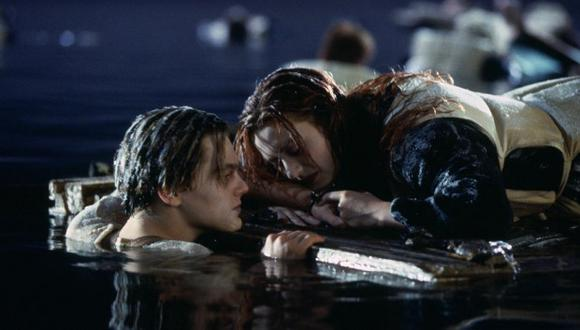

In [32]:
## 4.2 Genere una tabla que muestre la cantidad de personas agrupadas por sexo y clase.
pd.pivot_table(titanic, index = ["sex", "pclass"], values = ["survived"], aggfunc = 'count', margins="true", margins_name = "TOTALES")

survived
sex     pclass          
female  1             92
        2             76
        3            144
male    1            122
        2            108
        3            347
TOTALES              889

In [33]:
pd.pivot_table(titanic, index = ["pclass"], values = ["survived"], aggfunc = 'count', margins="true", margins_name = "TOTALES")
#Se muestra el total de pasajeros por clase

,survived
pclass,
1,214
2,184
3,491
TOTALES,889


In [34]:
## 4.3 Muestre la misma información del punto 1, pero la cantidad de sobrevivientes.
pd.pivot_table(titanic, values=['survived'], index=["sex", "pclass"], margins="true", margins_name = "TOTALES",
                    aggfunc={'survived': np.sum})

survived
sex     pclass          
female  1             89
        2             70
        3             72
male    1             45
        2             17
        3             47
TOTALES              340

Hasta ahora hemos examinado las tasas de supervivencia según el sexo y la clase de pasajeros. Otro factor que podría haber influido en la supervivencia es la edad. **¿Los niños varones tenían tanta probabilidad de morir como las mujeres en general?** Podemos investigar esta pregunta mediante la indexación múltiple, o pivotando en más de dos variables, agregando otro índice.

Divida la información de la columna "age" en intervalos, creando así una nueva categoría que se puede utilizar para agrupar. Divida el conjunto en intervalos de (0, 12], (12, 18] y (18, 80].

4. Genere la tabla que le ayude a responder la pregunta anterior (considerando los rangos definidos).
5. Para una mejor interpretación de la información anterior, genere una tabla con el número de entradas por cada grupo.






In [35]:
### 4.4 Genere la tabla que le ayude a responder la pregunta anterior (considerando los rangos definidos).
bins = [0, 12, 18, 80]
titanic['range'] = pd.cut(titanic['age'], bins)
titanic.head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,survived,pclass,sex,age,fare,embarked,range
0,0,3,male,22.000000,7.2500,S,"(18, 80]"
1,1,1,female,38.000000,71.2833,C,"(18, 80]"
2,1,3,female,26.000000,7.9250,S,"(18, 80]"
3,1,1,female,35.000000,53.1000,S,"(18, 80]"
4,0,3,male,35.000000,8.0500,S,"(18, 80]"
5,0,3,male,29.699118,8.4583,Q,"(18, 80]"
6,0,1,male,54.000000,51.8625,S,"(18, 80]"
7,0,3,male,2.000000,21.0750,S,"(0, 12]"
8,1,3,female,27.000000,11.1333,S,"(18, 80]"
9,1,2,female,14.000000,30.0708,C,"(12, 18]"


<font color='red'> Corchete ], significa que incluye al 12 por ejemplo en el resultado(0.0, 12.0]</font><br>
<font color='red'>Parentesis (, signifca que no incluye al 12 por ejemplo en el resultado(12.0, 18.0] 
</font><br>


In [36]:
### 4.5 Para una mejor interpretación de la información anterior, genere una tabla con el número de entradas por cada grupo.
pd.pivot_table(titanic, values=['survived'], index=['range'],
                    aggfunc=[np.sum,'count',np.mean], margins="true", margins_name = "TOTALES").rename(columns={'sum': 'sobrevivientes', 'count': 'cantidadpers', 'mean':'% de sobrevivientes'})

,sobrevivientes,cantidadpers,% de sobrevivientes
,survived,survived,survived
range,,,
"(0, 12]",40,69,0.579710
"(12, 18]",30,70,0.428571
"(18, 80]",270,750,0.360000
TOTALES,340,889,0.382452


In [37]:
pd.pivot_table(titanic, values=['survived'], index=['range', 'sex'], aggfunc=[np.sum,'count', np.mean], margins="true"
                ,margins_name = "TOTALES").rename(columns={'sum': 'sobrevivientes', 'count': 'cantidadpers', 'mean':'% de sobrevivientes'})

sobrevivientes cantidadpers % de sobrevivientes
                      survived     survived            survived
range    sex                                                   
(0, 12]  female             19           32            0.593750
         male               21           37            0.567568
(12, 18] female             27           36            0.750000
         male                3           34            0.088235
(18, 80] female            185          244            0.758197
         male               85          506            0.167984
TOTALES                    340          889            0.382452

**¿Los niños varones tenían tanta probabilidad de morir como las mujeres en general?**
<br><font color='red'> Los niños varones tenían una probabilidad mayor de morir, ya que su porcentaje de supervivencia es de un 56,7% vs un 74% de las mujeres </font><br> 

<font color='red'>De esta tabla podemos concluir que la afirmación de la frase ¡Mujeres y niños primero! en la evacuación es verósimil. La tasa de sobrevivencia de niños menores de 12 años es muy similar entre ambos sexos (siendo un valor sobre el 50% para ambos casos), y para los rangos de edad mayor a 12 años, las mujeres tienen una tasa de sobrevivencia muy por sobre los hombres</font>
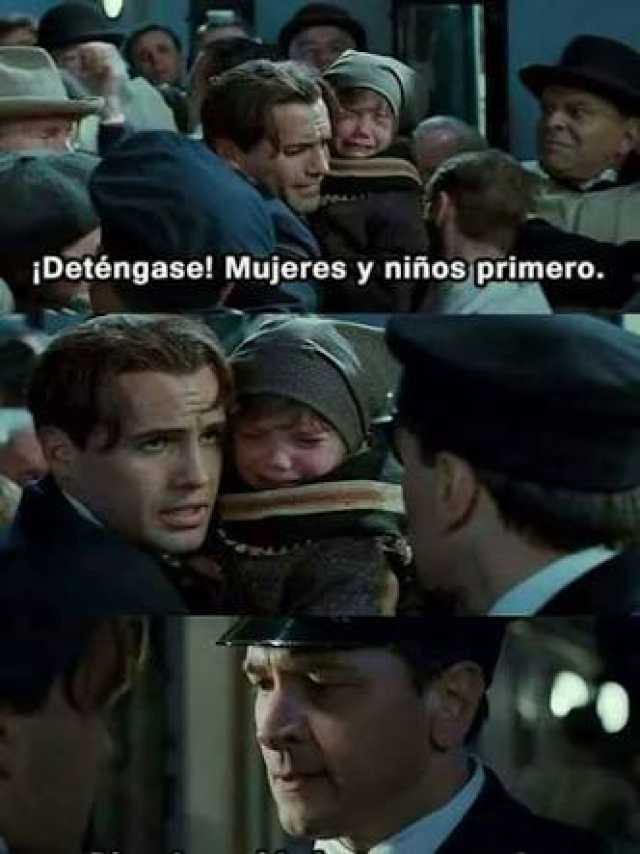


In [38]:
pvt = pd.pivot_table(titanic, values=['survived'], index=['range', 'sex'],
                    aggfunc=[np.sum,'count'], margins="true", margins_name = "TOTALES").reset_index().rename(columns={'sum': 'sobrevivientes', 'count': 'cantidadpers'})

print("El porcentaje de niños varones que sobrevivieron es",round((pvt.iloc [1, 2] / pvt.iloc [1, 3]) * 100,2), "%")
print("El porcentaje de mujeres que sobrevivieron es",round((pvt.iloc [4, 2] + pvt.iloc [2, 2] + pvt.iloc[0,2])  / (pvt.iloc [4, 3] + pvt.iloc [2, 3] + pvt.iloc [0, 3]) * 100,2), "%")


El porcentaje de niños varones que sobrevivieron es 56.76 %
El porcentaje de mujeres que sobrevivieron es 74.04 %


In [39]:
pd.pivot_table(titanic, values=['survived'], index=['sex'],
                    aggfunc=[np.sum,'count', np.mean], margins="true", margins_name = "TOTALES").rename(columns={'sum': 'sobrevivientes', 'count': 'cantidadpers', 'mean':'% de sobrevivientes'})

,sobrevivientes,cantidadpers,% de sobrevivientes
,survived,survived,survived
sex,,,
female,231,312,0.740385
male,109,577,0.188908
TOTALES,340,889,0.382452


<font color='red'> Si se observa solamente la tasa de sobrevivencia por sexo, la tasa de las mujeres es muy mayor a lo de los hombres, lo cual se explica en la forma de evacuación, donde se privilegió a niños y mujeres.</font>

In [40]:
pd.pivot_table(titanic, values=['survived'], index=['range','pclass'], aggfunc=[np.sum,'count', np.mean], margins="true"
                ,margins_name = "TOTALES").rename(columns={'sum': 'sobrevivientes', 'count': 'cantidadpers', 'mean':'% de sobrevivientes'})

sobrevivientes cantidadpers % de sobrevivientes
                      survived     survived            survived
range    pclass                                                
(0, 12]  1                   3            4            0.750000
         2                  17           17            1.000000
         3                  20           48            0.416667
(12, 18] 1                  11           12            0.916667
         2                   6           12            0.500000
         3                  13           46            0.282609
(18, 80] 1                 120          198            0.606061
         2                  64          155            0.412903
         3                  86          397            0.216625
TOTALES                    340          889            0.382452

<font color='red'>Podemos concluir que la tasa de sobrevivencia de las personas menores de 12 años es mayor a los otros rangos, independiente de la clase en la que viajaron. Además para edades mayores a 12 años, si se observa una relación entre tasa de sobrevivencia y clase, donde a mayor clase, mayor tasa de sobrevivencia, lo cual permite presumir que además de diferencia de edad y género a la hora de evacuar, también se diferenciaba por la clase.</font>

Pandas también admite la indexación múltiple en las columnas. Como ejemplo, considere el precio de los boletos de un pasajero. Esta es otra característica continua que se puede discretizar. Divida los precios en 2 cuantiles iguales (baratos y caros). Algunos de los grupos resultantes podrían estar vacíos; para mejorar la legibilidad de la tabla use un guión en las casillas vacías.

6. Genere una tabla que nos permita ver el efecto del precio de los tickets.

In [41]:
## 4.6 Genere una tabla que nos permita ver el efecto del precio de los tickets.
titanic['quantil'] = pd.cut(x=titanic['fare'], bins=[titanic['fare'].min(), titanic['fare'].median(), titanic['fare'].max()], labels=['Lows', 'Highs'], right=False)
titanic

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,survived,pclass,sex,age,fare,embarked,range,quantil
0,0,3,male,22.000000,7.2500,S,"(18, 80]",Lows
1,1,1,female,38.000000,71.2833,C,"(18, 80]",Highs
2,1,3,female,26.000000,7.9250,S,"(18, 80]",Lows
3,1,1,female,35.000000,53.1000,S,"(18, 80]",Highs
4,0,3,male,35.000000,8.0500,S,"(18, 80]",Lows
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,13.0000,S,"(18, 80]",Lows
887,1,1,female,19.000000,30.0000,S,"(18, 80]",Highs
888,0,3,female,29.699118,23.4500,S,"(18, 80]",Highs
889,1,1,male,26.000000,30.0000,C,"(18, 80]",Highs


In [42]:
print(titanic['quantil'].isnull().sum())

3


<font color='red'>
Segun el resultado del print anterior, en la columna quantil quedaron tres null por lo tanto se realiza un replace con un -

</font>

In [43]:
titanic['quantil'] = titanic['quantil'].cat.add_categories('-')
titanic['quantil'].fillna('-', inplace =True)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [44]:
pd.pivot_table(titanic, values=['survived'], index=['pclass','quantil','embarked'], aggfunc=[np.sum,'count', np.mean], margins="true"
                ,margins_name = "TOTALES").rename(columns={'sum': 'sobrevivientes', 'count': 'cantidadpers', 'mean':'% de sobrevivientes'})

sobrevivientes cantidadpers % de sobrevivientes
                               survived     survived            survived
pclass  quantil embarked                                                
1       Lows    S                     0            6            0.000000
        Highs   C                    56           82            0.682927
                Q                     1            2            0.500000
                S                    74          121            0.611570
        -       C                     3            3            1.000000
2       Lows    C                     4            5            0.800000
                Q                     2            3            0.666667
                S                    27           84            0.321429
        Highs   C                     5           12            0.416667
                S                    49           80            0.612500
3       Lows    C                    12           40            0.300000
                Q                    21           54            0.388889
                S                    45          248            0.181452
        Highs   C                    13           26            0.500000
                Q                     6           18            0.333333
                S                    22          105            0.209524
TOTALES                             340          889            0.382452

<font color = 'red'>Al categorizar los tickets en solamente dos grupos, nos damos cuenta de inconsistencias en los resultados ya que aparece un porcentaje no despreciable de ticket de valor alto en la clase más baja. 
Ello se explica porque el 55% de los pasajeros viajaban en tercera clase, por lo que al dividir en 2 grupos, un porcentaje de los datos está clasificado en el cuartil superior.</font>

<font color='green'>Fin Actividad 4</font>

## <font color='green'>Actividad 5</font>

### Análisis de una Hipótesis

Supongamos que alguien afirma que la ciudad desde la que se embarcó un pasajero tuvo una gran influencia en la tasa de supervivencia del pasajero. Investigue esta afirmación.

7. Verifique las tasas de supervivencia de los pasajeros según el lugar desde donde se embarcaron (indicadas en la columna "embarked").

8. Cree una tabla dinámica para examinar las tasas de supervivencia según el lugar de embarque y el género.

9. ¿Qué le sugieren estas tablas sobre la importancia de dónde se embarcaron las personas para influir en su tasa de supervivencia? Examine el contexto del problema y explique lo que cree que esto realmente significa.

10. Investigue la afirmación más a fondo con al menos dos tablas dinámicas más, explorando otros criterios (por ejemplo, clase, edad, etc.). Explique cuidadosamente sus conclusiones.

In [45]:
# Cree una tabla dinámica para examinar las tasas de supervivencia según el lugar de embarque
pd.pivot_table(titanic, index=['embarked'], values=['survived'], margins= True ,aggfunc=[np.sum,'count', np.mean]
               , margins_name = "TOTALES").rename(columns={'sum': 'sobrevivientes', 'count': 'cantidadpers', 'mean':'% de sobrevivientes'})


,sobrevivientes,cantidadpers,% de sobrevivientes
,survived,survived,survived
embarked,,,
C,93,168,0.553571
Q,30,77,0.389610
S,217,644,0.336957
TOTALES,340,889,0.382452


<font color='red'>
El signficado de la tasa de embarque es: C = Cherburgo Q = Queenstown S = Southampton<br>
**##En conclusion las mujeres que se embarcaron en Cherburgo, sobrevieron mas que el resto de mujeres que se embarcaron en otro lugar

</font>

In [46]:
## Cree una tabla dinámica para examinar las tasas de supervivencia según el lugar de embarque y el género.
pd.pivot_table(titanic, index=['embarked','sex'], values=['survived'], aggfunc=[np.sum,'count', np.mean], margins="true"
                , margins_name = "TOTALES").rename(columns={'sum': 'sobrevivientes', 'count': 'cantidadpers', 'mean':'% de sobrevivientes'})

sobrevivientes cantidadpers % de sobrevivientes
                      survived     survived            survived
embarked sex                                                   
C        female             64           73            0.876712
         male               29           95            0.305263
Q        female             27           36            0.750000
         male                3           41            0.073171
S        female            140          203            0.689655
         male               77          441            0.174603
TOTALES                    340          889            0.382452

<font color='red'>
De esta tabla podemos concluir que el puerto de embarque no tiene relación con la tasa de sobrevivencia, sino que esta depende principalmente por la clase en la que viajaban los pasajeros.
</font>

In [47]:
pd.pivot_table(titanic, index=['pclass', 'sex'], columns=['embarked'],values=['survived'], aggfunc=['count',np.sum,np.mean], margins="true", margins_name = "TOTALES").rename(columns={'sum': 'sobrevivientes', 'count': 'cantidadpers', 'mean':'% de sobrevivientes'})

cantidadpers           ... % de sobrevivientes                    
                   survived           ...            survived                    
embarked                  C   Q    S  ...                   Q         S   TOTALES
pclass  sex                           ...                                        
1       female           43   1   48  ...            1.000000  0.958333  0.967391
        male             42   1   79  ...            0.000000  0.354430  0.368852
2       female            7   2   67  ...            1.000000  0.910448  0.921053
        male             10   1   97  ...            0.000000  0.154639  0.157407
3       female           23  33   88  ...            0.727273  0.375000  0.500000
        male             43  39  265  ...            0.076923  0.128302  0.135447
TOTALES                 168  77  644  ...            0.389610  0.336957  0.382452

[7 rows x 12 columns]

<font color='red'>La mayoria de los pasajeros que se subieron en Queenstown, se subieron a la clase 3 y pese a ello sobrevivieron en mayor porcentaje</font><br>



In [48]:
##Investigue la afirmación más a fondo con al menos dos tablas dinámicas más, 
##explorando otros criterios (por ejemplo, clase, edad, etc.)
##Explique cuidadosamente sus conclusiones.

In [49]:
df1 = pd.pivot_table(titanic, index=['embarked'], columns=['pclass'],values=['survived'], aggfunc=['count',np.sum,np.mean], margins="true", margins_name = "TOTALES").rename(columns={'sum': 'sobrevivientes', 'count': 'cantidadpers', 'mean':'% de sobrevivientes'})

In [50]:
df1

cantidadpers            ... % de sobrevivientes                    
             survived            ...            survived                    
pclass              1    2    3  ...                   2         3   TOTALES
embarked                         ...                                        
C                  85   17   66  ...            0.529412  0.378788  0.553571
Q                   2    3   72  ...            0.666667  0.375000  0.389610
S                 127  164  353  ...            0.463415  0.189802  0.336957
TOTALES           214  184  491  ...            0.472826  0.242363  0.382452

[4 rows x 12 columns]

In [51]:
a = (round((df1.loc['Q'][0]/df1.loc['Q'][3])*100,2))
b = (round((df1.loc['Q'][1]/df1.loc['Q'][3])*100,2))
c = (round((df1.loc['Q'][2]/df1.loc['Q'][3])*100,2))
d = (round((df1.loc['S'][0]/df1.loc['S'][3])*100,2))
e = (round((df1.loc['S'][1]/df1.loc['S'][3])*100,2))
f = (round((df1.loc['S'][2]/df1.loc['S'][3])*100,2))
dfQ = pd.DataFrame(data=[a,b,c],index=['Clase1','Clase2','Clase3'], columns=['EmbarquexClase - Queenstown(%)'])
dfQ

,EmbarquexClase - Queenstown(%)
Clase1,2.60
Clase2,3.90
Clase3,93.51


In [52]:
dfS = pd.DataFrame(data=[d,e,f],index=['Clase1','Clase2','Clase3'], columns=['EmbarquexClase - Southamptom(%)'])
dfS

,EmbarquexClase - Southamptom(%)
Clase1,19.72
Clase2,25.47
Clase3,54.81


<font color = "red">Las persona que se embarcaron en Q, se ubicaron en un 94% en la clase 3, la cual es tuvo menor porcentaje de
sobrevivencia. Pese a ello la tasa de sobrevivencia total de las personas provenientes de Q es mayor que los embarcados de
S, los cuales tuvieron una distribución heterogénea dentro de las tres clases del Titanic. </font>

In [53]:
pd.pivot_table(titanic, values=['survived'], index=["embarked","pclass"],
                    aggfunc={'survived': np.mean}, margins="true", margins_name = "TOTALES")

survived
embarked pclass          
C        1       0.694118
         2       0.529412
         3       0.378788
Q        1       0.500000
         2       0.666667
         3       0.375000
S        1       0.582677
         2       0.463415
         3       0.189802
TOTALES          0.382452

In [54]:
q1 = titanic['fare'].quantile(0.25)
q2 = titanic['fare'].quantile(0.5)
q3 = titanic['fare'].quantile(0.75)

In [55]:
titanic['quantil2'] = pd.cut(x=titanic['fare'], bins=[titanic['fare'].min(), q1, q2, q3, titanic['fare'].max()], labels=['Very Low', 'Low', 'Medium', 'Highs'], right=False)
titanic

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,survived,pclass,sex,age,fare,embarked,range,quantil,quantil2
0,0,3,male,22.000000,7.2500,S,"(18, 80]",Lows,Very Low
1,1,1,female,38.000000,71.2833,C,"(18, 80]",Highs,Highs
2,1,3,female,26.000000,7.9250,S,"(18, 80]",Lows,Low
3,1,1,female,35.000000,53.1000,S,"(18, 80]",Highs,Highs
4,0,3,male,35.000000,8.0500,S,"(18, 80]",Lows,Low
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,13.0000,S,"(18, 80]",Lows,Low
887,1,1,female,19.000000,30.0000,S,"(18, 80]",Highs,Medium
888,0,3,female,29.699118,23.4500,S,"(18, 80]",Highs,Medium
889,1,1,male,26.000000,30.0000,C,"(18, 80]",Highs,Medium


In [56]:
print(q1)
print()
print(q2)
print()
print(q3)
print()

7.8958

14.4542

31.0



In [57]:
pd.pivot_table(titanic, values=['survived'], index=['pclass','quantil2'], aggfunc=[np.sum,'count', np.mean], margins="true"
                ,margins_name = "TOTALES").rename(columns={'sum': 'sobrevivientes', 'count': 'cantidadpers', 'mean':'% de sobrevivientes'})

sobrevivientes cantidadpers % de sobrevivientes
                       survived     survived            survived
pclass  quantil2                                                
1       Very Low              0            6            0.000000
        Medium               25           48            0.520833
        Highs               106          157            0.675159
2       Very Low              0            6            0.000000
        Low                  33           86            0.383721
        Medium               42           70            0.600000
        Highs                12           22            0.545455
3       Very Low             43          173            0.248555
        Low                  35          169            0.207101
        Medium               33          108            0.305556
        Highs                 8           41            0.195122
TOTALES                     337          886            0.380361

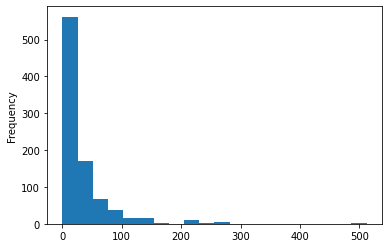

In [58]:
import matplotlib.pyplot as plt

titanic['fare'].plot.hist(bins=20)

In [59]:
titanic[titanic['pclass']==1].describe()

,survived,pclass,age,fare
count,214.000000,214.0,214.000000,214.000000
mean,0.626168,1.0,36.927073,84.193516
std,0.484954,0.0,14.007537,78.746457
min,0.000000,1.0,0.920000,0.000000
25%,0.000000,1.0,29.000000,30.771850
50%,1.000000,1.0,35.000000,58.689600
75%,1.000000,1.0,47.000000,93.500000
max,1.000000,1.0,80.000000,512.329200


In [60]:
titanic[titanic['pclass']==2].describe()

,survived,pclass,age,fare
count,184.000000,184.0,184.000000,184.000000
mean,0.472826,2.0,29.866958,20.662183
std,0.500623,0.0,13.573825,13.417399
min,0.000000,2.0,0.670000,0.000000
25%,0.000000,2.0,23.000000,13.000000
50%,0.000000,2.0,29.699118,14.250000
75%,1.000000,2.0,36.000000,26.000000
max,1.000000,2.0,70.000000,73.500000


In [61]:
titanic[titanic['pclass']==3].describe()

,survived,pclass,age,fare
count,491.000000,491.0,491.000000,491.000000
mean,0.242363,3.0,26.403259,13.675550
std,0.428949,0.0,10.815245,11.778142
min,0.000000,3.0,0.420000,0.000000
25%,0.000000,3.0,20.250000,7.750000
50%,0.000000,3.0,29.699118,8.050000
75%,0.000000,3.0,29.699118,15.500000
max,1.000000,3.0,74.000000,69.550000


In [62]:
pd.pivot_table(titanic, values=['fare'], index=['pclass','embarked'], aggfunc=['count', np.mean, np.median, np.min, np.max], margins="true"
                ,margins_name = "TOTALES")

count        mean   median     amin      amax
                  fare        fare     fare     fare      fare
pclass  embarked                                              
1       C           85  104.718529  78.2667  26.5500  512.3292
        Q            2   90.000000  90.0000  90.0000   90.0000
        S          127   70.364862  52.0000   0.0000  263.0000
2       C           17   25.358335  24.0000  12.0000   41.5792
        Q            3   12.350000  12.3500  12.3500   12.3500
        S          164   20.327439  13.5000   0.0000   73.5000
3       C           66   11.214083   7.8958   4.0125   22.3583
        Q           72   11.183393   7.7500   6.7500   29.1250
        S          353   14.644083   8.0500   0.0000   69.5500
TOTALES            889   32.096681  14.4542   0.0000  512.3292

<font color='red'> Se observa una diferencia en el precio de las tarifas según el puerto de embarque para las clases 1 y 2. El puerto con la tarifa más alta es el ubicado en Cherbourg - Francia, seguido del puerto de Southampton - UK, lo cual presumiblemente se explica por la trayectoria que tuvo que seguir el barco para recoger a los pasajeros en los distintos puertos.

En la tercera clase no existe una diferencia sustancial en el valor del ticket, independiente del puerto de embarque.
</font>